# Tarea - Ajuste de curvas
# Úrsula Vargas López
# 740388
# 02/03/2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [1]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

## ORDEN 1

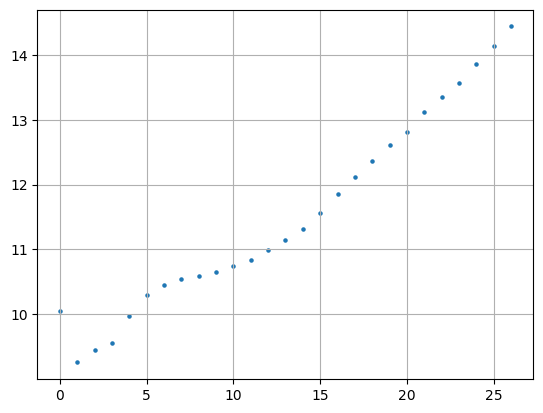

In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(0,26,27)
y=data

plt.figure()
plt.scatter(x,y,s=5)#tamaño de los puntos
plt.grid()

In [64]:
import scipy.optimize as opt

def foo(beta,X,y): #función costo 
    m,n = X.shape #Para darle forma general a Beta
    beta= np.reshape(beta,[n,1])# el tamaño del vector beta,para que pueda ser multiplicado por X
    prediccion= X @ beta
    error= prediccion - y
    return (error.T @ error)[0][0]

In [65]:
m= len(y) #en este caso m es de 27
ones =np.ones([m,1]) #función para vector de unos 
ones
x1= np.reshape(x,[m,1])#función para vector x
x1

X=np.hstack((ones,x1))#función conjunta de ones con x = matriz X
X

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 19.],
       [ 1., 20.],
       [ 1., 21.],
       [ 1., 22.],
       [ 1., 23.],
       [ 1., 24.],
       [ 1., 25.],
       [ 1., 26.]])

In [66]:
beta_inicial= np.random.rand(2,1) #tamaño de beta 
beta_inicial #función para vector beta

array([[0.60540051],
       [0.52917138]])

In [67]:
y_vector= np.reshape(y,[m,1])
y_vector

array([[10.051101],
       [ 9.259127],
       [ 9.444813],
       [ 9.557723],
       [ 9.977324],
       [10.298326],
       [10.447217],
       [10.550506],
       [10.590784],
       [10.657418],
       [10.743085],
       [10.831965],
       [10.988435],
       [11.153055],
       [11.313326],
       [11.557165],
       [11.860136],
       [12.122511],
       [12.356448],
       [12.611391],
       [12.814569],
       [13.111372],
       [13.357134],
       [13.559012],
       [13.85861 ],
       [14.135924],
       [14.436149]])

---

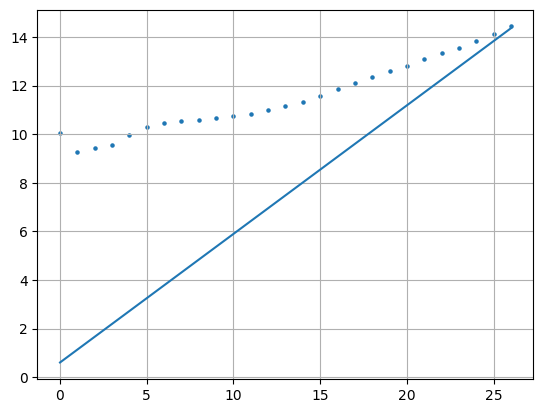

In [68]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X@beta_inicial)
plt.grid()

In [69]:
foo(beta_inicial,X,y_vector) #para calcular el error

639.0863858847518

In [70]:
sol=opt.minimize(foo,beta_inicial,args=(X,y_vector))
sol

<ipython-input-70-9dec6699aab1>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol=opt.minimize(foo,beta_inicial,args=(X,y_vector))


      fun: 2.3704889518149668
 hess_inv: array([[ 0.07010581, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([-1.51991844e-06, -1.31130219e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([9.11567623, 0.18667056])

In [71]:
beta=np.reshape(sol.x,[2,1])
beta

array([[9.11567623],
       [0.18667056]])

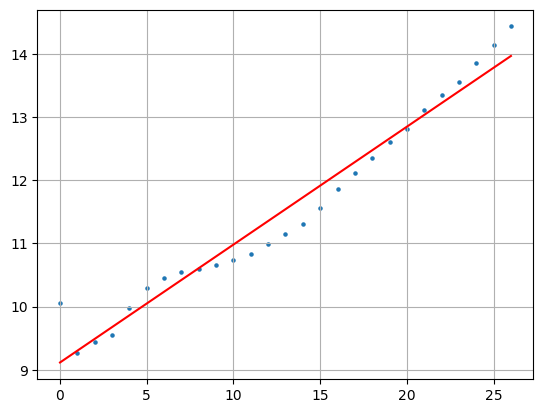

In [72]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X@beta,"r")#roja
plt.grid()


## ORDEN 2 

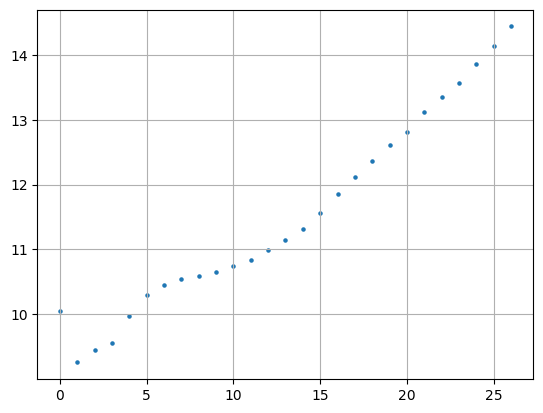

In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(0,26,27)
y=data

plt.figure()
plt.scatter(x,y,s=5)#tamaño de los puntos
plt.grid()

In [74]:
import scipy.optimize as opt

def foo(beta,X,y): #función costo 
    m,n = X.shape #Para darle forma general a Beta
    beta= np.reshape(beta,[n,1])# el tamaño del vector beta,para que pueda ser multiplicado por X
    prediccion= X @ beta
    error= prediccion - y
    return (error.T @ error)[0][0]

In [75]:
m= len(y) #en este caso m es de 27
ones =np.ones([m,1]) #función para vector de unos 
ones
x1= np.reshape(x,[m,1])#función para vector x
x1

x2=np.reshape(x**2,[m,1]) #función para el vector x^2

X2=np.hstack((ones,x1,x2))#función conjunta de ones con x y x^2 = matriz X
X2

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  20., 400.],
       [  1.,  21., 441.],
       [  1.,  22., 484.],
       [  1.,  23., 529.],
       [  1.,  24., 576.],
       [  1.,  25., 625.],
       [  1.,  26., 676.]])

In [76]:
beta_inicial= np.random.rand(3,1) #tamaño de beta 
beta_inicial #función para vector beta

array([[0.36837228],
       [0.6608931 ],
       [0.31625146]])

In [78]:
y_vector #porque es la misma y en este problema

array([[10.051101],
       [ 9.259127],
       [ 9.444813],
       [ 9.557723],
       [ 9.977324],
       [10.298326],
       [10.447217],
       [10.550506],
       [10.590784],
       [10.657418],
       [10.743085],
       [10.831965],
       [10.988435],
       [11.153055],
       [11.313326],
       [11.557165],
       [11.860136],
       [12.122511],
       [12.356448],
       [12.611391],
       [12.814569],
       [13.111372],
       [13.357134],
       [13.559012],
       [13.85861 ],
       [14.135924],
       [14.436149]])

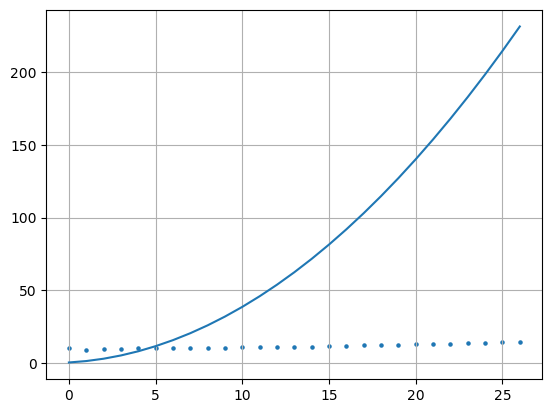

In [79]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X2@beta_inicial)
plt.grid()

In [80]:
foo(beta_inicial,X2,y_vector) #para calcular el error

264077.6984530019

In [81]:
sol=opt.minimize(foo,beta_inicial,args=(X2,y_vector))
sol

<ipython-input-81-9fbe6fda019e>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol=opt.minimize(foo,beta_inicial,args=(X2,y_vector))


      fun: 0.8443845193942927
 hess_inv: array([[ 1.44225534e-01, -2.17569829e-02,  6.84181854e-04],
       [-2.17569829e-02,  4.57454490e-03, -1.64203634e-04],
       [ 6.84181854e-04, -1.64203634e-04,  6.31552425e-06]])
      jac: array([ 3.50177288e-07, -1.04308128e-07,  6.70552254e-08])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([9.59128650e+00, 7.25241199e-02, 4.39024746e-03])

In [82]:
beta2=np.reshape(sol.x,[3,1])#TAMAÑO DE BETA
beta2

array([[9.59128650e+00],
       [7.25241199e-02],
       [4.39024746e-03]])

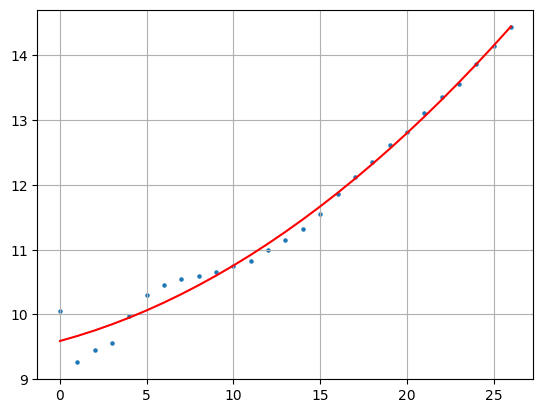

In [83]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X2@beta2,"r")#roja
plt.grid()


## ORDEN 3 

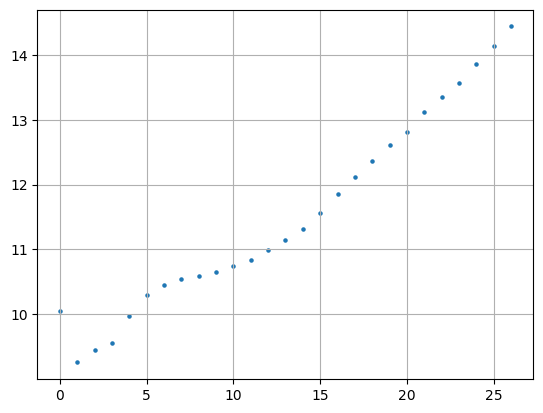

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(0,26,27)
y=data

plt.figure()
plt.scatter(x,y,s=5)#tamaño de los puntos
plt.grid()


In [85]:
import scipy.optimize as opt

def foo(beta,X,y): #función costo 
    m,n = X.shape #Para darle forma general a Beta
    beta= np.reshape(beta,[n,1])# el tamaño del vector beta,para que pueda ser multiplicado por X
    prediccion= X @ beta
    error= prediccion - y
    return (error.T @ error)[0][0]

In [88]:
m= len(y) #en este caso m es de 27
ones =np.ones([m,1]) #función para vector de unos 
ones
x1= np.reshape(x,[m,1])#función para vector x
x1

x2=np.reshape(x**2,[m,1]) #función para el vector x^2

x3=np.reshape(x**3,[m,1]) #función para el vector x^3

X3=np.hstack((ones,x1,x2,x3))#función conjunta de ones con x, x^2, x^3 = matriz X
X3

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03],
       [1.0000e+00, 1.1000e+01, 1.2100e+02, 1.3310e+03],
       [1.0000e+00, 1.2000e+01, 1.4400e+02, 1.7280e+03],
       [1.0000e+00, 1.3000e+01, 1.6900e+02, 2.1970e+03],
       [1.0000e+00, 1.4000e+01, 1.9600e+02, 2.7440e+03],
       [1.0000e+00, 1.5000e+01, 2.2500e+02, 3.3750e+03],
       [1.0000e+00, 1.6000e+01, 2.5600e+02, 4.0960e+03],
       [1.0000e+00, 1.7000e+01,

In [87]:
beta_inicial= np.random.rand(4,1) #tamaño de beta 
beta_inicial #función para vector beta

array([[0.15012193],
       [0.07002203],
       [0.36222926],
       [0.90524203]])

In [ ]:
y_vector

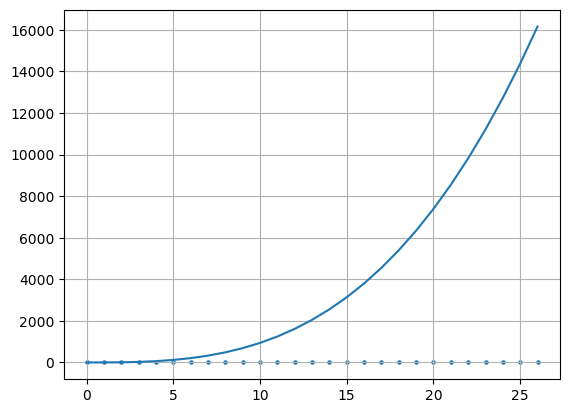

In [89]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X3@beta_inicial)
plt.grid()

In [91]:
foo(beta_inicial,X3,y_vector) #para calcular el error

1107196031.1891541

In [93]:
sol=opt.minimize(foo,beta_inicial,args=(X3,y_vector))
sol

<ipython-input-93-4d65851eda28>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol=opt.minimize(foo,beta_inicial,args=(X3,y_vector))


      fun: 0.8404346758468845
 hess_inv: array([[ 2.26770333e-01, -8.84691940e+01,  8.29231190e+00,
        -1.51180222e-01],
       [-8.84691940e+01,  3.45142226e+04, -3.23505419e+03,
         5.89794626e+01],
       [ 8.29231190e+00, -3.23505419e+03,  3.03225046e+02,
        -5.52820793e+00],
       [-1.51180222e-01,  5.89794626e+01, -5.52820793e+00,
         1.00786815e-01]])
      jac: array([0.00000000e+00, 2.98023224e-08, 9.23871994e-07, 2.06530094e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 273
      nit: 12
     njev: 54
   status: 2
  success: False
        x: array([9.56752299e+00, 8.46495834e-02, 3.20207442e-03, 3.04659689e-05])

In [94]:
beta3=np.reshape(sol.x,[4,1])#TAMAÑO DE BETA
beta3

array([[9.56752299e+00],
       [8.46495834e-02],
       [3.20207442e-03],
       [3.04659689e-05]])

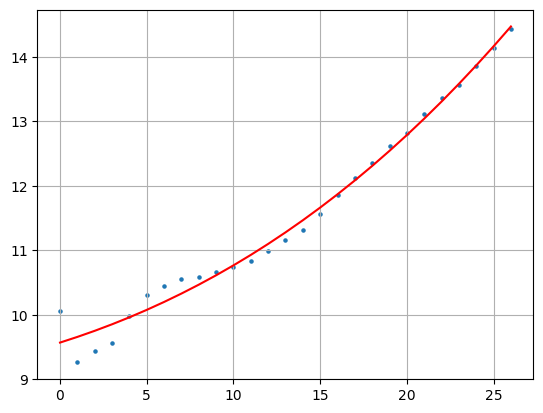

In [95]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X3@beta3,"r")#roja
plt.grid()

### Tres curvas ajustadas junto a los datos de los costos en un solo gráfico

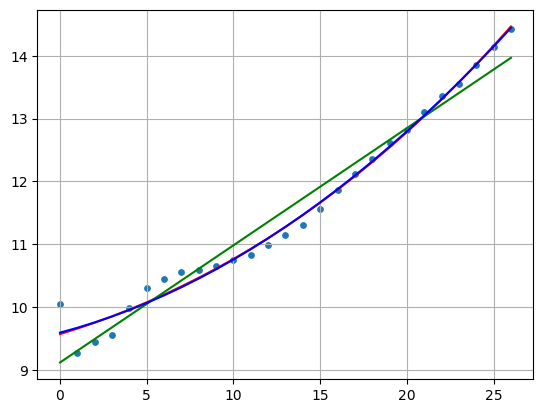

In [99]:
plt.figure()
plt.scatter(x,y,s=15)
plt.plot(x,X3@beta3,"r")#roja
plt.plot(x,X@beta,"g")#verde
plt.plot(x,X2@beta2,"b")#azul
plt.grid()

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [155]:
import pandas as pd


df = pd.read_csv("population_data.csv")
print(df)

    Year  Poblacion  Nacimientos  Decesos
0   1950      28296      1174947   418430
1   1951      29110      1183788   458238
2   1952      29980      1195209   408823
3   1953      30904      1261775   446127
4   1954      31880      1339837   378752
..   ...        ...          ...      ...
61  2011     115683      2586287   590693
62  2012     117054      2498880   602354
63  2013     118395      2478889   623599
64  2014     119713      2463420   633641
65  2015     121005      2353596   655694

[66 rows x 4 columns]


### Parte 1, ORDEN 1

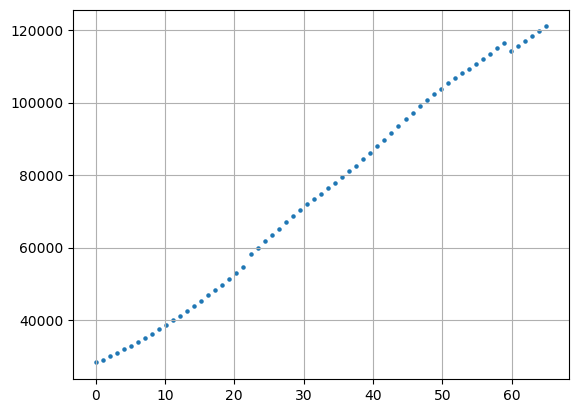

In [165]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

poblacion= np.array([28296,29110,29980,30904,31880,32906,33978,35095,36253,37448,38677,39939,41234,42564,43931,45339,46784,48264,49788,51361,52988,54669,
58156,59931,61708,63486,65261,67013,68715,70353,71916,73416,74880,76351,77859,79410,80999,82635,84327,86077,87890,89758,91654,93542,95393,97202,98969,
100679,102317,103874,105340,106724,108056,109382,110732,112117,113530,114968,116423,114255,115683,117054,118395,119713,121005])
x=np.linspace(0,65,65)
y= poblacion #intenté utilizar df["poblacion"] pero me dió problemas al hacer mi "vector y".

plt.figure()
plt.scatter(x,y,s=5)#tamaño de los puntos
plt.grid()

In [166]:
import scipy.optimize as opt

def foo(beta,X,y): #función costo 
    m,n = X.shape #Para darle forma general a Beta
    beta= np.reshape(beta,[n,1])# el tamaño del vector beta,para que pueda ser multiplicado por X
    prediccion= X @ beta
    error= prediccion - y
    return (error.T @ error)[0][0]

In [167]:
m= len(y) 
ones =np.ones([m,1]) #función para vector de unos 
ones
x1= np.reshape(x,[m,1])#función para vector x
x1

X=np.hstack((ones,x1))#función conjunta de ones con x = matriz X
X

array([[ 1.      ,  0.      ],
       [ 1.      ,  1.015625],
       [ 1.      ,  2.03125 ],
       [ 1.      ,  3.046875],
       [ 1.      ,  4.0625  ],
       [ 1.      ,  5.078125],
       [ 1.      ,  6.09375 ],
       [ 1.      ,  7.109375],
       [ 1.      ,  8.125   ],
       [ 1.      ,  9.140625],
       [ 1.      , 10.15625 ],
       [ 1.      , 11.171875],
       [ 1.      , 12.1875  ],
       [ 1.      , 13.203125],
       [ 1.      , 14.21875 ],
       [ 1.      , 15.234375],
       [ 1.      , 16.25    ],
       [ 1.      , 17.265625],
       [ 1.      , 18.28125 ],
       [ 1.      , 19.296875],
       [ 1.      , 20.3125  ],
       [ 1.      , 21.328125],
       [ 1.      , 22.34375 ],
       [ 1.      , 23.359375],
       [ 1.      , 24.375   ],
       [ 1.      , 25.390625],
       [ 1.      , 26.40625 ],
       [ 1.      , 27.421875],
       [ 1.      , 28.4375  ],
       [ 1.      , 29.453125],
       [ 1.      , 30.46875 ],
       [ 1.      , 31.484375],
       [

In [188]:
beta_inicial= np.random.rand(2,1) #tamaño de beta 
beta_inicial #función para vector beta

array([[0.09407767],
       [0.11267016]])

In [189]:
y_vector= np.reshape(y,[m,1])
y_vector

array([[ 28296],
       [ 29110],
       [ 29980],
       [ 30904],
       [ 31880],
       [ 32906],
       [ 33978],
       [ 35095],
       [ 36253],
       [ 37448],
       [ 38677],
       [ 39939],
       [ 41234],
       [ 42564],
       [ 43931],
       [ 45339],
       [ 46784],
       [ 48264],
       [ 49788],
       [ 51361],
       [ 52988],
       [ 54669],
       [ 58156],
       [ 59931],
       [ 61708],
       [ 63486],
       [ 65261],
       [ 67013],
       [ 68715],
       [ 70353],
       [ 71916],
       [ 73416],
       [ 74880],
       [ 76351],
       [ 77859],
       [ 79410],
       [ 80999],
       [ 82635],
       [ 84327],
       [ 86077],
       [ 87890],
       [ 89758],
       [ 91654],
       [ 93542],
       [ 95393],
       [ 97202],
       [ 98969],
       [100679],
       [102317],
       [103874],
       [105340],
       [106724],
       [108056],
       [109382],
       [110732],
       [112117],
       [113530],
       [114968],
       [116423

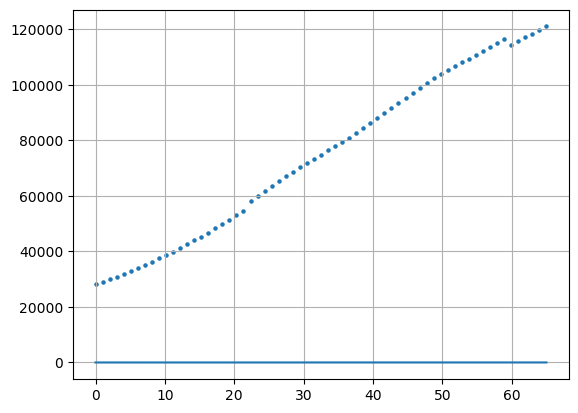

In [190]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X@beta_inicial)
plt.grid()



In [191]:
foo(beta_inicial,X,y_vector) #para calcular el error



418606797193.02325

In [192]:
sol=opt.minimize(foo,beta_inicial,args=(X,y_vector))
sol

<ipython-input-192-9dec6699aab1>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol=opt.minimize(foo,beta_inicial,args=(X,y_vector))


      fun: 243389342.69299448
 hess_inv: array([[ 1.67968136e-02, -3.85451018e-04],
       [-3.85451018e-04,  1.42886651e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 123
      nit: 10
     njev: 41
   status: 0
  success: True
        x: array([24199.42889785,  1550.56710725])

In [193]:
betados=np.reshape(sol.x,[2,1])
betados

array([[24199.42889785],
       [ 1550.56710725]])

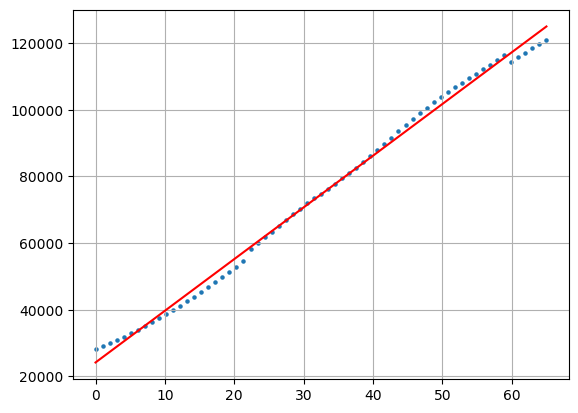

In [194]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X@betados,"r")#roja
plt.grid()

## ORDEN 2 

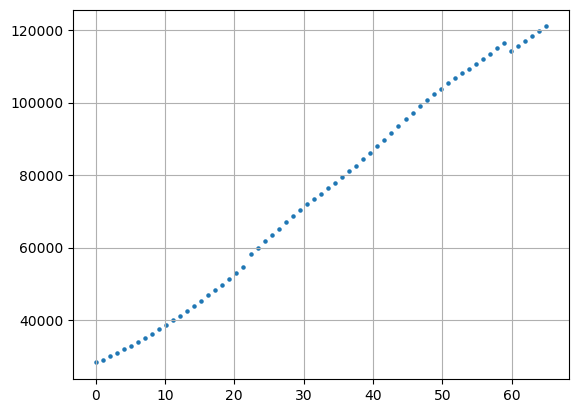

In [195]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

poblacion= np.array([28296,29110,29980,30904,31880,32906,33978,35095,36253,37448,38677,39939,41234,42564,43931,45339,46784,48264,49788,51361,52988,54669,
58156,59931,61708,63486,65261,67013,68715,70353,71916,73416,74880,76351,77859,79410,80999,82635,84327,86077,87890,89758,91654,93542,95393,97202,98969,
100679,102317,103874,105340,106724,108056,109382,110732,112117,113530,114968,116423,114255,115683,117054,118395,119713,121005])
x=np.linspace(0,65,65)
y= poblacion #intenté utilizar df["poblacion"] pero me dió problemas al hacer mi "vector y".

plt.figure()
plt.scatter(x,y,s=5)#tamaño de los puntos
plt.grid()

import scipy.optimize as opt

def foo(beta,X,y): #función costo 
    m,n = X.shape #Para darle forma general a Beta
    beta= np.reshape(beta,[n,1])# el tamaño del vector beta,para que pueda ser multiplicado por X
    prediccion= X @ beta
    error= prediccion - y
    return (error.T @ error)[0][0]


In [196]:
m= len(y) 
ones =np.ones([m,1]) #función para vector de unos 
ones
x1= np.reshape(x,[m,1])#función para vector x
x1

x2=np.reshape(x**2,[m,1]) #función para el vector x^2

X2=np.hstack((ones,x1,x2))#función conjunta de ones con x y x^2 = matriz X

beta_inicial= np.random.rand(3,1) #tamaño de beta 
 #función para vector beta


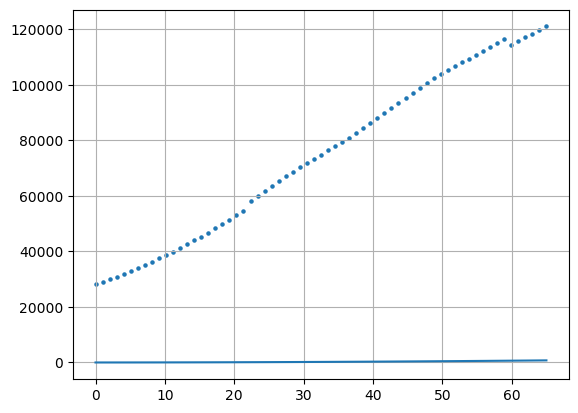

In [197]:
y_vector

plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X2@beta_inicial)
plt.grid()


In [198]:
foo(beta_inicial,X2,y_vector) #para calcular el error

415229641682.75714

In [199]:
sol=opt.minimize(foo,beta_inicial,args=(X2,y_vector))
sol

<ipython-input-199-9fbe6fda019e>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol=opt.minimize(foo,beta_inicial,args=(X2,y_vector))


      fun: 242124874.9424677
 hess_inv: array([[ 1.09134443e-01, -6.50533557e-03,  8.17471584e-05],
       [-6.50533557e-03,  4.74649938e-04, -6.53063859e-06],
       [ 8.17471584e-05, -6.53063859e-06,  9.49731510e-08]])
      jac: array([-2., -4.,  2.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 135
      nit: 9
     njev: 31
   status: 2
  success: False
        x: array([ 2.39016438e+04,  1.57849226e+03, -4.29622272e-01])

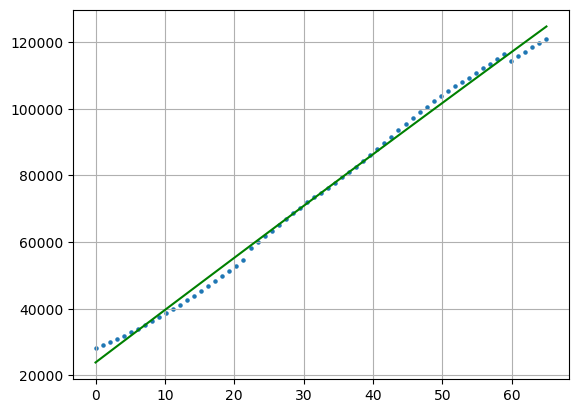

In [204]:
betados2=np.reshape(sol.x,[3,1])
betados2

plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X2@betados2,"g")#verde
plt.grid()

## ORDEN 3 

In [210]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

poblacion= np.array([28296,29110,29980,30904,31880,32906,33978,35095,36253,37448,38677,39939,41234,42564,43931,45339,46784,48264,49788,51361,52988,54669,
58156,59931,61708,63486,65261,67013,68715,70353,71916,73416,74880,76351,77859,79410,80999,82635,84327,86077,87890,89758,91654,93542,95393,97202,98969,
100679,102317,103874,105340,106724,108056,109382,110732,112117,113530,114968,116423,114255,115683,117054,118395,119713,121005])
x=np.linspace(0,65,65)
y= poblacion #intenté utilizar df["poblacion"] pero me dió problemas al hacer mi "vector y".


import scipy.optimize as opt

def foo(beta,X,y): #función costo 
    m,n = X.shape #Para darle forma general a Beta
    beta= np.reshape(beta,[n,1])# el tamaño del vector beta,para que pueda ser multiplicado por X
    prediccion= X @ beta
    error= prediccion - y
    return (error.T @ error)[0][0]

In [211]:
m= len(y) 
ones =np.ones([m,1]) #función para vector de unos 
ones
x1= np.reshape(x,[m,1])#función para vector x
x1

x2=np.reshape(x**2,[m,1]) #función para el vector x^2

x3=np.reshape(x**3,[m,1]) #función para el vector x^3

X3=np.hstack((ones,x1,x2,x3))#función conjunta de ones con x y x^2 = matriz X

beta_inicial= np.random.rand(4,1) #tamaño de beta 
 #función para vector beta


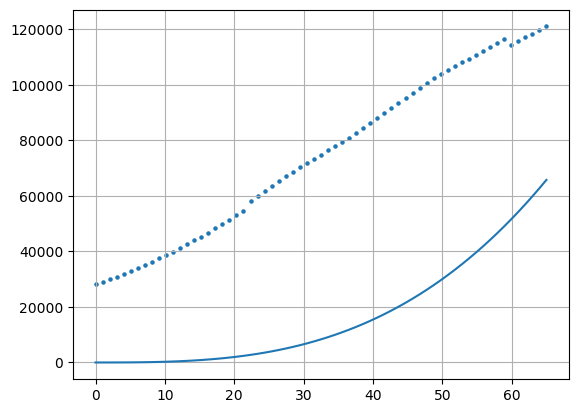

In [212]:
y_vector

plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X3@beta_inicial)
plt.grid()

In [213]:
foo(beta_inicial,X3,y_vector) #para calcular el error

231326566036.23074

In [214]:
sol=opt.minimize(foo,beta_inicial,args=(X3,y_vector))
sol

<ipython-input-214-4d65851eda28>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol=opt.minimize(foo,beta_inicial,args=(X3,y_vector))


      fun: 33841903.31631599
 hess_inv: array([[ 1.15193438e-01, -1.32275560e-02,  4.00751197e-04,
        -3.53904825e-06],
       [-1.32275560e-02,  2.06105655e-03, -7.07774168e-05,
         6.70484249e-07],
       [ 4.00751197e-04, -7.07774168e-05,  2.60109715e-06,
        -2.57298345e-08],
       [-3.53904825e-06,  6.70484249e-07, -2.57298345e-08,
         2.62228842e-10]])
      jac: array([ 0. ,  1.5, 29. ,  2. ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 212
      nit: 10
     njev: 40
   status: 2
  success: False
        x: array([ 2.82200321e+04,  7.48938738e+02,  3.17248194e+01, -3.29788873e-01])

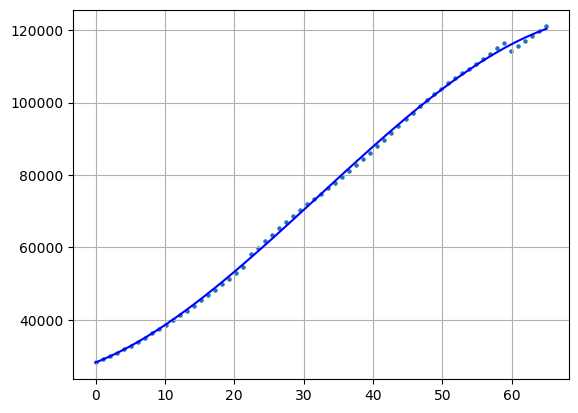

In [215]:
betados3=np.reshape(sol.x,[4,1])
betados3

plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X3@betados3,"b")#azul
plt.grid()

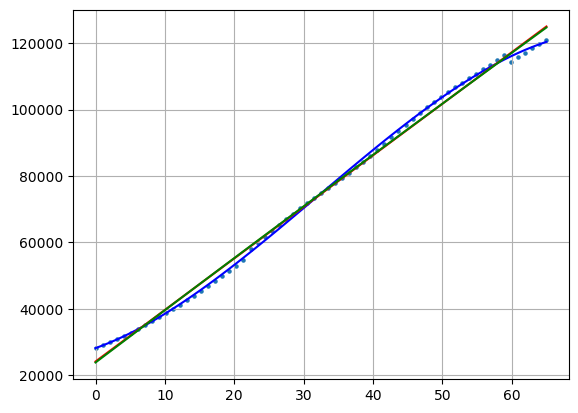

In [217]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X3@betados3,"b")#azul
plt.plot(x,X@betados,"r")#rojo
plt.plot(x,X2@betados2,"g")#verde
plt.grid()

## Graficar el error cuadrático acumulado contra el número de términos.

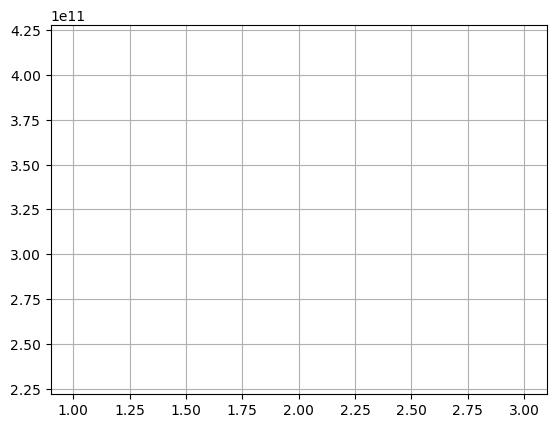

In [220]:
orden_x1=1
orden_x2=2
orden_x3=3

y1= 418606797193.02325
y2= 415229641682.75714
y3= 231326566036.23074

plt.figure()
plt.plot(orden_x1,y1,"b")#azul
plt.plot(orden_x2,y2,"r")#rojo
plt.plot(orden_x3,y3,"g")#verde
plt.grid()

## PUNTO DOS, ORDEN 1

In [221]:
import pandas as pd


df = pd.read_csv("population_data.csv")
print(df)

    Year  Poblacion  Nacimientos  Decesos
0   1950      28296      1174947   418430
1   1951      29110      1183788   458238
2   1952      29980      1195209   408823
3   1953      30904      1261775   446127
4   1954      31880      1339837   378752
..   ...        ...          ...      ...
61  2011     115683      2586287   590693
62  2012     117054      2498880   602354
63  2013     118395      2478889   623599
64  2014     119713      2463420   633641
65  2015     121005      2353596   655694

[66 rows x 4 columns]


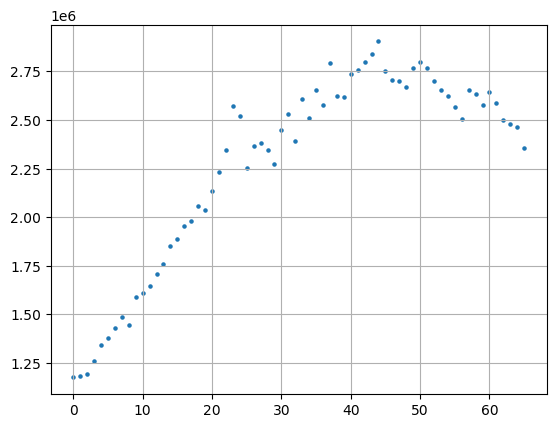

In [236]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nacimiento=np.array([1174947,1183788,1195209,1261775,1339837,1377917,1427722,1485202,1447578,1589606,1608174,1647006,1705481,1756624,1849408,1888171,
1954340,1981363,2058251,2037561,2132630,2231399,2346002,2572287,2522580,2254497,2366305,2379327,2346862,2274267,2446238,2530662,2392849,2609088,2511894,
2655671,2577045,2794390,2622031,2620262,2735312,2756447,2797397,2839686,2904389,2750444,2707718,2698425,2668429,2769089,2798339,2767610,2699084,2655894,
2625056,2567906,2505939,2655083,2636110,2577214,2643908,2586287,2498880,2478889,2463420,2353596])

x=np.linspace(0,65,66)
y= nacimiento

plt.figure()
plt.scatter(x,y,s=5)#tamaño de los puntos
plt.grid()

In [237]:
import scipy.optimize as opt

def foo(beta,X,y): #función costo 
    m,n = X.shape #Para darle forma general a Beta
    beta= np.reshape(beta,[n,1])# el tamaño del vector beta,para que pueda ser multiplicado por X
    prediccion= X @ beta
    error= prediccion - y
    return (error.T @ error)[0][0]

In [243]:
m= len(y) 
ones =np.ones([m,1]) #función para vector de unos 
ones
x1= np.reshape(x,[m,1])#función para vector x
x1

X=np.hstack((ones,x1))

beta_inicial= np.random.rand(2,1) #tamaño de beta 
 #función para vector beta


In [244]:
y_vector= np.reshape(y,[m,1])
y_vector

array([[1174947],
       [1183788],
       [1195209],
       [1261775],
       [1339837],
       [1377917],
       [1427722],
       [1485202],
       [1447578],
       [1589606],
       [1608174],
       [1647006],
       [1705481],
       [1756624],
       [1849408],
       [1888171],
       [1954340],
       [1981363],
       [2058251],
       [2037561],
       [2132630],
       [2231399],
       [2346002],
       [2572287],
       [2522580],
       [2254497],
       [2366305],
       [2379327],
       [2346862],
       [2274267],
       [2446238],
       [2530662],
       [2392849],
       [2609088],
       [2511894],
       [2655671],
       [2577045],
       [2794390],
       [2622031],
       [2620262],
       [2735312],
       [2756447],
       [2797397],
       [2839686],
       [2904389],
       [2750444],
       [2707718],
       [2698425],
       [2668429],
       [2769089],
       [2798339],
       [2767610],
       [2699084],
       [2655894],
       [2625056],
       [25

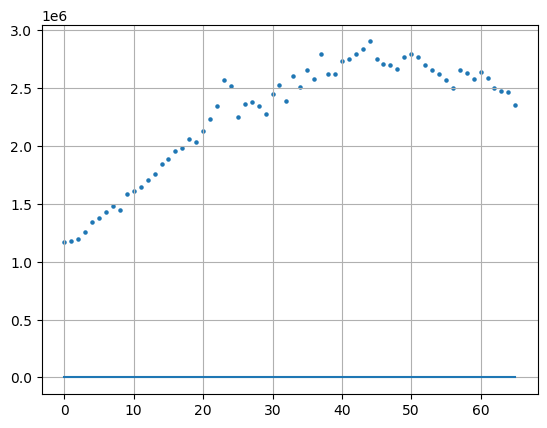

In [245]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X@beta_inicial)
plt.grid()

In [246]:
foo(beta_inicial,X,y_vector) #para calcular el error

358563542217993.8

In [247]:
sol=opt.minimize(foo,beta_inicial,args=(X,y_vector))
sol

<ipython-input-247-9dec6699aab1>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol=opt.minimize(foo,beta_inicial,args=(X,y_vector))


      fun: 4737913869444.065
 hess_inv: array([[ 2.56465260e-02, -5.87527378e-04],
       [-5.87527378e-04,  1.87968523e-05]])
      jac: array([    0., 65536.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 153
      nit: 5
     njev: 47
   status: 2
  success: False
        x: array([1563298.72718164,   21969.82386848])

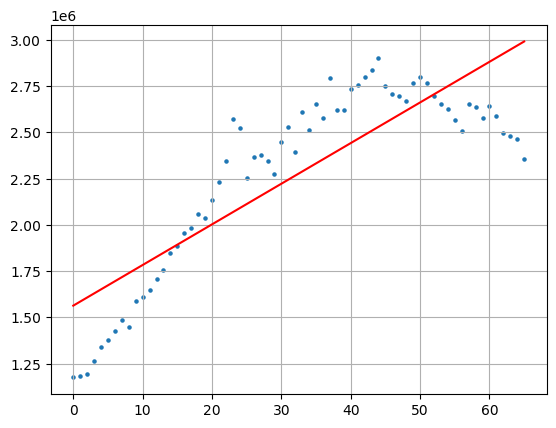

In [248]:
betados=np.reshape(sol.x,[2,1])
betados

plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X@betados,"r")#rojo
plt.grid()

## ORDEN 2 

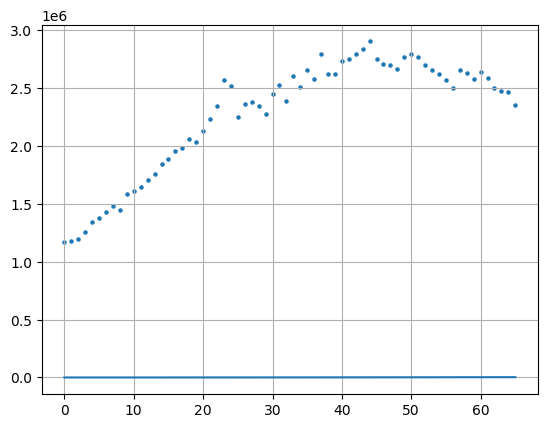

In [252]:
import scipy.optimize as opt

def foo(beta,X,y): #función costo 
    m,n = X.shape #Para darle forma general a Beta
    beta= np.reshape(beta,[n,1])# el tamaño del vector beta,para que pueda ser multiplicado por X
    prediccion= X @ beta
    error= prediccion - y
    return (error.T @ error)[0][0]

m= len(y) 
ones =np.ones([m,1]) #función para vector de unos 
ones
x1= np.reshape(x,[m,1])#función para vector x
x1
x2= np.reshape(x**2,[m,1])


X2=np.hstack((ones,x1,x2))

beta_inicial= np.random.rand(3,1) #tamaño de beta 
 #función para vector beta

y_vector

plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X2@beta_inicial)
plt.grid()

In [253]:
foo(beta_inicial,X2,y_vector) #para calcular el error

358251782346840.25

In [254]:
sol=opt.minimize(foo,beta_inicial,args=(X2,y_vector))
sol

<ipython-input-254-9fbe6fda019e>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol=opt.minimize(foo,beta_inicial,args=(X2,y_vector))


      fun: 492921630175.9676
 hess_inv: array([[ 3.37976473e-02, -2.13912719e-03,  2.76906316e-05],
       [-2.13912719e-03,  2.20231012e-04, -3.37091239e-06],
       [ 2.76906316e-05, -3.37091239e-06,  5.55993513e-08]])
      jac: array([      0.,  -28672., -937984.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 159
      nit: 8
     njev: 37
   status: 2
  success: False
        x: array([ 1.02138089e+06,  7.27618849e+04, -7.81363851e+02])

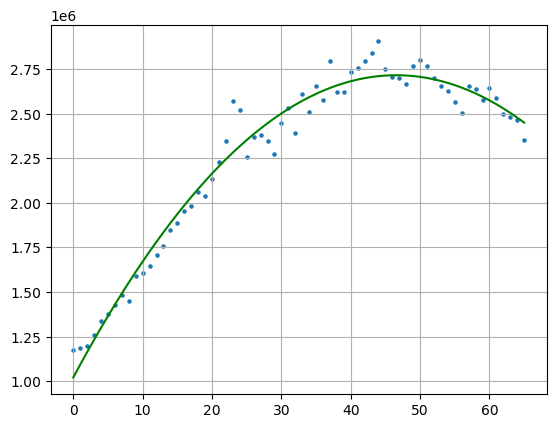

In [255]:
betados2=np.reshape(sol.x,[3,1])
betados2

plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X2@betados2,"g")#verde
plt.grid()

## ORDEN 3

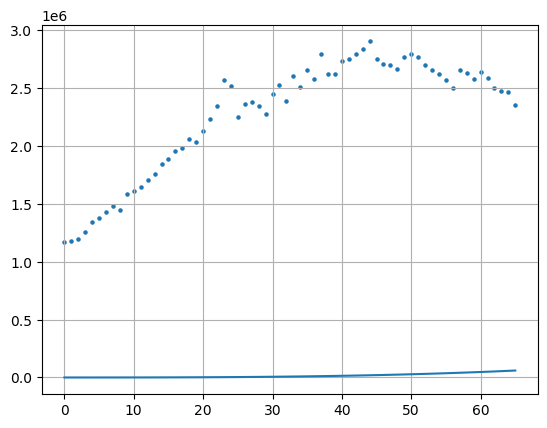

In [256]:
import scipy.optimize as opt

def foo(beta,X,y): #función costo 
    m,n = X.shape #Para darle forma general a Beta
    beta= np.reshape(beta,[n,1])# el tamaño del vector beta,para que pueda ser multiplicado por X
    prediccion= X @ beta
    error= prediccion - y
    return (error.T @ error)[0][0]

m= len(y) 
ones =np.ones([m,1]) #función para vector de unos 
ones
x1= np.reshape(x,[m,1])#función para vector x
x1
x2= np.reshape(x**2,[m,1])

x3=np.reshape(x**3,[m,1])


X3=np.hstack((ones,x1,x2,x3))

beta_inicial= np.random.rand(4,1) #tamaño de beta 
 #función para vector beta

y_vector

plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X3@beta_inicial)
plt.grid()

In [258]:
foo(beta_inicial,X3,y_vector) #para calcular el error

353284342392237.2

In [259]:
sol=opt.minimize(foo,beta_inicial,args=(X3,y_vector))
sol

<ipython-input-259-4d65851eda28>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol=opt.minimize(foo,beta_inicial,args=(X3,y_vector))


      fun: 441782388558.57184
 hess_inv: array([[ 3.45494935e-02, -6.67827836e-03,  2.41160616e-04,
        -2.35159003e-06],
       [-6.67827836e-03,  1.29106773e-03, -4.65931367e-05,
         4.54112024e-07],
       [ 2.41160616e-04, -4.65931367e-05,  1.75439751e-06,
        -1.76826806e-08],
       [-2.35159003e-06,  4.54112024e-07, -1.76826806e-08,
         1.83393017e-10]])
      jac: array([       0.,        0.,   -24576., -1691648.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 640
      nit: 13
     njev: 125
   status: 2
  success: False
        x: array([ 1.08825776e+06,  5.98738022e+04, -2.81312517e+02, -5.13133746e+00])

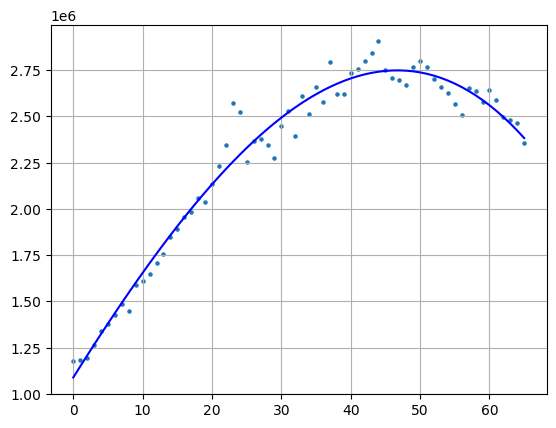

In [260]:
betados3=np.reshape(sol.x,[4,1])#tamaño de beta
betados3

plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X3@betados3,"b")#azul
plt.grid()

## Gráficos ajustados

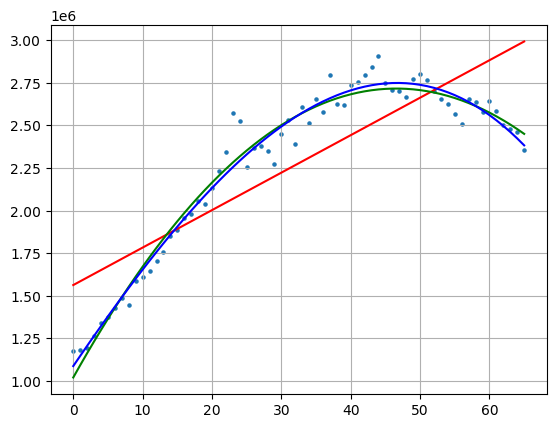

In [261]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(x,X@betados,"r")#rojo
plt.plot(x,X2@betados2,"g")#verde
plt.plot(x,X3@betados3,"b")#azul
plt.grid()